# Método de aceptación y rechazo para generar una distribución triangular

Elaboró: **MARTINEZ PEREA EMILLI ASHLEY**

Código que genera una distribución triangular a partir del método de aceptación y rechazo. Los datos de la distrbucion son datos aleatorios generados por el mismo código. Al final graficamos en un histograma los datos simulados, con la media y desviacion estandar respecto a esos datos.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean, stdev

La teoría empleada para este método es la siguiente:
1. Distribución Triangular

  La distribución triangular se define por tres parámetros:
  a: límite inferior \\
  b: moda (valor más probable) \\
  c: límite superior \\


Su función de densidad de probabilidad  es:

$$
f(x) =
\begin{cases}
0 & \text{si } x < a \text{ o } x > c \\
\frac{2(x - a)}{(b - a)(c - a)} & \text{si } a \leq x < b \\
\frac{2(c - x)}{(c - b)(c - a)} & \text{si } b \leq x \leq c
\end{cases}
$$

2. Altura máxima de la función

  La función alcanza su valor máximo en \( x = b \). Usando la geometría del triángulo:

$$
\text{Área} = \frac{1}{2} \cdot \text{base} \cdot \text{altura} = 1
\Rightarrow
\frac{1}{2}(c - a) \cdot h = 1
\Rightarrow
h = \frac{2}{c - a}
$$


Función que genera la distribución triangular

In [41]:
# Función de densidad de la distribución triangular
def triangular(x,a,b,c):
    if a <= x < b:
        return 2 * (x - a) / ((b - a) * (c - a))
    elif b <= x <= c:
        return 2 * (c - x) / ((c - b) * (c - a))
    else:
        return 0

In [42]:
# Parámetros de la distribución triangular
a = 1
b = 3
c = 5
x=b
# Valor máximo de la función de distribución(en x = b)
fmax = triangular(x,a,b,c)

Método de Aceptación y Rechazo

Para generar variables aleatorias con esta distribución se usa una distribución propuesta más simple, en este caso una uniforme $U(a, c)$, y se realiza el siguiente procedimiento:

1. Calcular $ fmax = f(b) $, el valor máximo de la función de distribución.
2. Generar un valor $ x \sim U(a, c) $.
3. Generar un valor $ u \sim U(0, fmax) $.
4. Aceptar  x si:
    $$ u \leq f(x) $$
5. Repetir hasta obtener el número deseado de muestras.

Función que realiza el método aceptación y rechazo

In [43]:
# Método de aceptación y rechazo
def metodo(n):
    valores = []
    intentos = 0  # contador de intentos totales
    while len(valores) < n:
        intentos += 1  # cada iteración es un intento
        x = np.random.uniform(a, c)
        u = np.random.uniform(0, fmax)
        if u <= triangular(x,a,b,c):
            valores.append(x)
    print(f"Total de valores aceptados: {n}")
    print(f"Total de intentos realizados: {intentos}")
    print(f"Tasa de aceptación: {n / intentos:.4f} ({(n / intentos)*100:.2f}%)")
    return np.array(valores)

Simulación de datos sobre la función previa

In [44]:
# Generar muestras
valores = metodo(10000)
simulacion = np.linspace(a, c, 1000)
distribucion = [triangular(x,a,b,c) for x in simulacion]

Total de valores aceptados: 10000
Total de intentos realizados: 19782
Tasa de aceptación: 0.5055 (50.55%)


Graficamos los datos

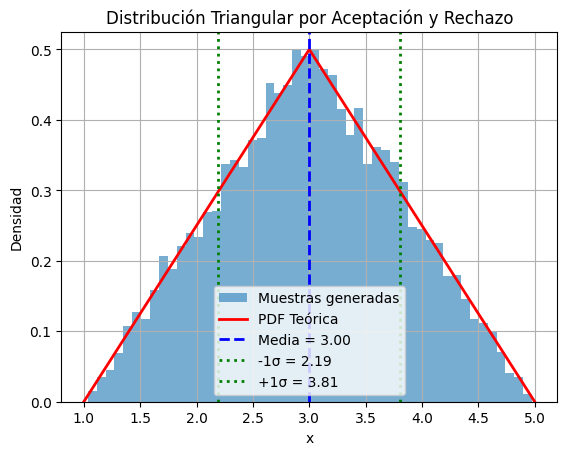

In [45]:
# Graficas
plt.hist(valores, bins=50, density=True, alpha=0.6, label='Muestras generadas')
plt.plot(simulacion, distribucion, 'r-', lw=2, label='PDF Teórica')
plt.axvline(mean(valores), color='blue', linestyle='--', linewidth=2, label=f'Media = {mean(valores):.2f}')
plt.axvline(mean(valores) - stdev(valores), color='green', linestyle=':', linewidth=2, label=f'-1σ = {mean(valores) - stdev(valores):.2f}')
plt.axvline(mean(valores) + stdev(valores), color='green', linestyle=':', linewidth=2, label=f'+1σ = {mean(valores) + stdev(valores):.2f}')
plt.title('Distribución Triangular por Aceptación y Rechazo')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [46]:
mediasimu = mean(valores)
stdevsimu = stdev(valores)

a, b, c = 1, 3, 5
mediateo = (a + b + c)/3
stdevteo = (a**2 + b**2 + c**2 - a*b - a*c - b*c)/18

print("Media teórica:", mediateo)
print("Media simulada:", mediasimu)

print("\nVarianza teórica:", stdevteo)
print("Varianza simulada:", stdevsimu)

Media teórica: 3.0
Media simulada: 2.999241826339429

Varianza teórica: 0.6666666666666666
Varianza simulada: 0.8086818467225507
